<StemContainer object of 3 artists>

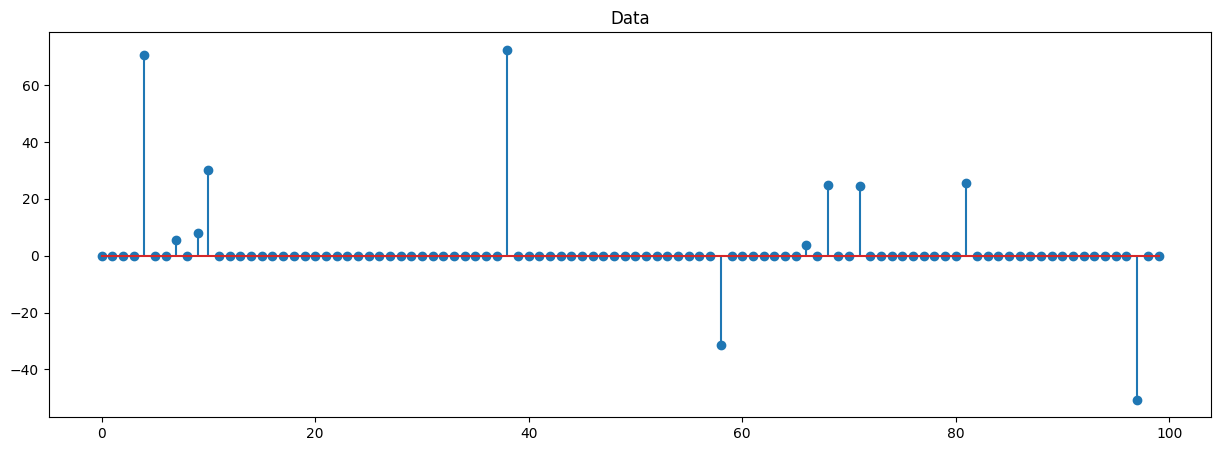

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split

def generate_signal(signal_length, num_nonzero):
    
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 50*np.random.randn(num_nonzero)  
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100  # Total length of the signal
num_nonzero = 10    # Number of non-zero elements in the signal
your_index_no=200352 # Enter without english letter and without leading zeros
signal = generate_signal(signal_length, num_nonzero)
signal[10] = (your_index_no % 10)*10 + 10
if  your_index_no % 10 == 0:
  signal[10] = np.random.randn(1) + 30


signal=signal.reshape(signal_length,1)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data")
plt.stem(signal)


min of data -85.1225624956555 max of data 61.24643855898485
mean of data -1.0896853537328868 std of data 14.039533975197358
no of non zero elements in original data 11
no of non zero elements in min-max scaled data 99
no of non zero elements in absMax scaled data 11
no of non zero elements in standard scaled data 100
(array([ 0, 10, 19, 24, 25, 41, 51, 52, 61, 68, 81], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))
mean of data -9.906230488480787 std of data 41.286279267931704


<StemContainer object of 3 artists>

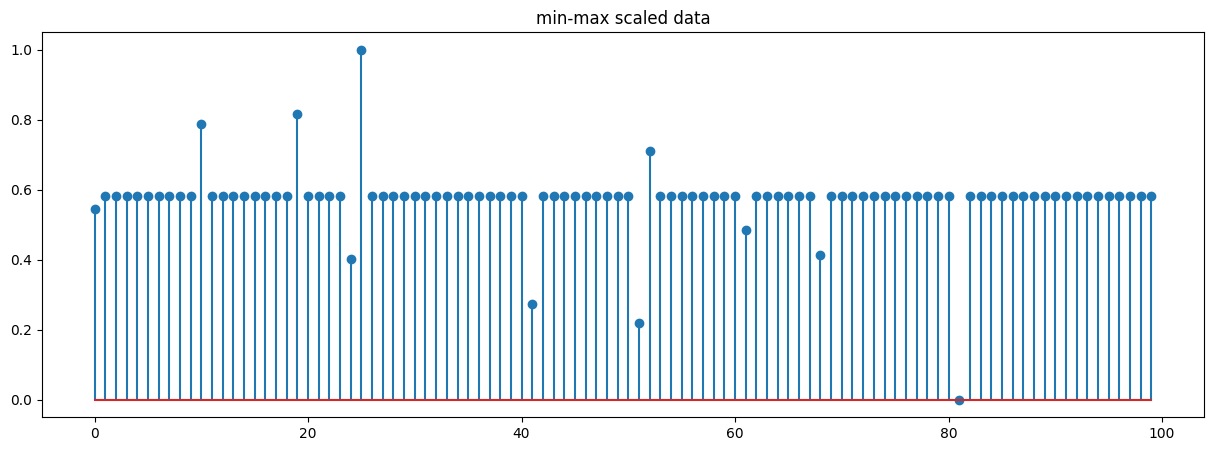

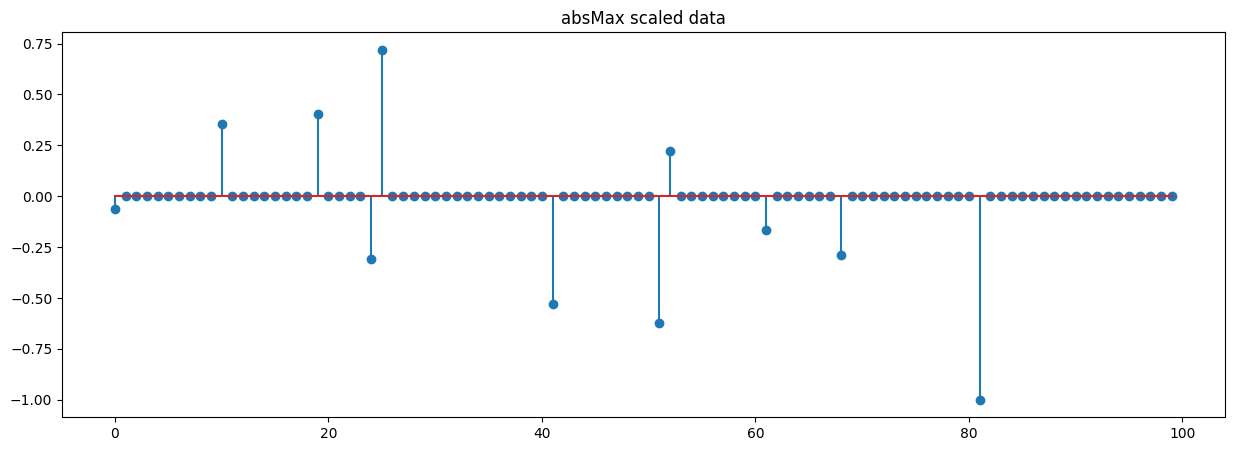

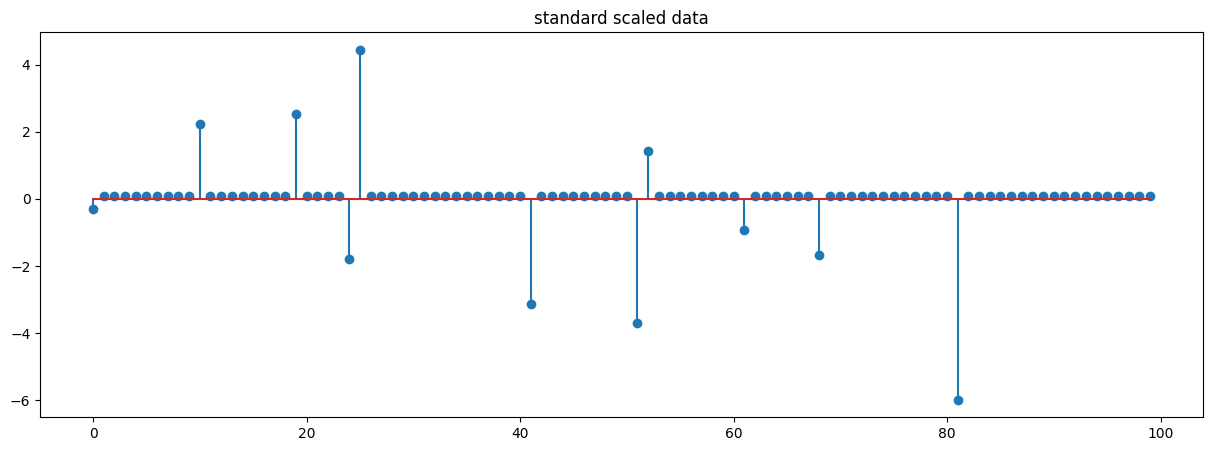

In [12]:
def min_max_scale(data):
    min_val = np.min(data)
    max_val = np.max(data)
    print("min of data", min_val, "max of data", max_val)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

def standardize(data):
    mean = np.mean(data)
    std = np.std(data)
    print("mean of data", mean, "std of data", std)
    scaled_data = (data - mean) / std
    return scaled_data

scaled_data_min_max = min_max_scale(signal)
scaled_data_absMax = MaxAbsScaler().fit_transform(signal)
scaled_data_standard = standardize(signal)
min_max_nonzero =np.nonzero(scaled_data_min_max)
absMax_nonzero = np.nonzero(scaled_data_absMax)
standard_nonzero = np.nonzero(scaled_data_standard)
original_nonzero = np.nonzero(signal)
#print(scaled_data_standard[3])
print("no of non zero elements in original data", len(original_nonzero[0]))
print("no of non zero elements in min-max scaled data", len(min_max_nonzero[0]))
print("no of non zero elements in absMax scaled data", len(absMax_nonzero[0]))
print("no of non zero elements in standard scaled data", len(standard_nonzero[0]))
print(absMax_nonzero)

standard_nonzero = standardize(signal[signal != 0])
#stem plots of the original normalized data to visualize the effects of each normalization method on the data.
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("min-max scaled data")
plt.stem(scaled_data_min_max)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("absMax scaled data")
plt.stem(scaled_data_absMax)
plt.figure(figsize=(15,5))
plt.subplot(1,1,1)
plt.title("standard scaled data")
plt.stem(scaled_data_standard)





Absolute maximum normalization is the suitable normalization.

In [13]:
import numpy as np
import pandas as pd
# Load data from CSV
file_path = r'Advertising.csv'
df = pd . read_csv ( file_path )
print ( df . head () )


   sample index     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9


In [14]:
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
feature_cols = ['TV', 'radio', 'newspaper']
x=df.loc[:,feature_cols]
y=df.loc[:,'sales']
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size =0.8)
model=LinearRegression()
model.fit(X_train,y_train)
print("intercept",model.intercept_)
print("coefficients",model.coef_)
y_pred_train=model.predict(X_train)
r_sq_train = model.score(X_train, y_train)
MSE_train = mean_squared_error(y_train, y_pred_train)
RSS_train=np.sum((y_train-y_pred_train)**2)
N=len(y_train)
d=1+len(model.coef_)
RSE_train=np.sqrt(RSS_train/(N-d))
residuals = y_train - y_pred_train

# Calculate the standard error of the residuals
stderr = np.std(residuals)

# Calculate the standard errors for each coefficient
X_train_mean = X_train.mean()
stderr_coef = stderr / (np.sqrt(np.sum((X_train - X_train_mean) ** 2, axis=0)))

# Calculate the t-values for each coefficient
t_values = model.coef_ / stderr_coef
#std_error_TV_train=RSE_train/np.sqrt(np.sum((X_train['TV']-np.mean(X_train['TV']))**2))
#print(model.coef_[0]/std_error_TV_train)
#std_error_radio_train=RSE_train/np.sqrt(np.sum((X_train['radio']-np.mean(X_train['radio']))**2))
#print(model.coef_[1]/std_error_radio_train)
#calculate the p-values for each coefficient
p_values = 2 * (1 - stats.t.cdf(np.abs(t_values), df=len(X_train) - 1))
print("R^2 for training data",r_sq_train)
print("MSE for training data",MSE_train)
print("RSS for training data",RSS_train)
print("RSE for training data",RSE_train)
for i, coef in enumerate(model.coef_):
    print(f"Feature: {feature_cols[i]}, t-value: {t_values[i]:.4f}, p-value: {p_values[i]:.4f}")

print('\n')
print('standard error for each feature')
print(stderr_coef)





intercept 2.994893030495323
coefficients [ 0.04458402  0.19649703 -0.00278146]
R^2 for training data 0.9067114990146383
MSE for training data 2.406814755818906
RSS for training data 385.090360931025
RSE for training data 1.5711549747513953
Feature: TV, t-value: 30.7863, p-value: 0.0000
Feature: radio, t-value: 23.5353, p-value: 0.0000
Feature: newspaper, t-value: -0.4848, p-value: 0.6285


standard error for each feature
TV           0.001448
radio        0.008349
newspaper    0.005737
dtype: float64


In [15]:
y_pred_test=model.predict(X_test)
r_sq_test = model.score(X_test, y_test)
MSE_test = mean_squared_error(y_test, y_pred_test)
RSS_test=np.sum((y_test-y_pred_test)**2)
N=len(y_test)
d=1+len(model.coef_)
RSE_test=np.sqrt(RSS_test/(N-d))
residuals = y_test - y_pred_test
stderr_test = np.std(residuals)
X_test_mean = X_test.mean()
stderr_coef_test = stderr_test / (np.sqrt(np.sum((X_test - X_test_mean) ** 2, axis=0)))
t_values_test = model.coef_ / stderr_coef_test
p_values_test = 2 * (1 - stats.t.cdf(np.abs(t_values_test), df=len(X_test) - 1))
print("R^2 for test data",r_sq_test)
print("MSE for test data",MSE_test)
print("RSS for test data",RSS_test)
print("RSE for test data",RSE_test)
for i, coef in enumerate(model.coef_):
    print(f"Feature: {feature_cols[i]}, t-value: {t_values_test[i]:.4f}, p-value: {p_values_test[i]:.4f}")

print('\n')
print('standard error for each feature in test data')
print(stderr_coef_test)


R^2 for test data 0.8601145185017869
MSE for test data 4.40211829144968
RSS for test data 176.08473165798722
RSE for test data 2.2116153702791994
Feature: TV, t-value: 11.8293, p-value: 0.0000
Feature: radio, t-value: 9.0491, p-value: 0.0000
Feature: newspaper, t-value: -0.1928, p-value: 0.8481


standard error for each feature in test data
TV           0.003769
radio        0.021715
newspaper    0.014429
dtype: float64


In [9]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())




                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     505.4
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           4.23e-80
Time:                        20:22:34   Log-Likelihood:                -297.29
No. Observations:                 160   AIC:                             602.6
Df Residuals:                     156   BIC:                             614.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9949      0.330      9.076      0.0

In [10]:
print("p-values for each feature")
print(results.pvalues)
print('\n')
print("t-values for each feature")
print(results.tvalues)

p-values for each feature
const        4.646537e-16
TV           4.457494e-67
radio        1.148993e-49
newspaper    6.528098e-01
dtype: float64


t-values for each feature
const         9.076301
TV           30.212152
radio        21.993929
newspaper    -0.450730
dtype: float64


intercept -3.0738181818181856
coefficients [-0.93581818]


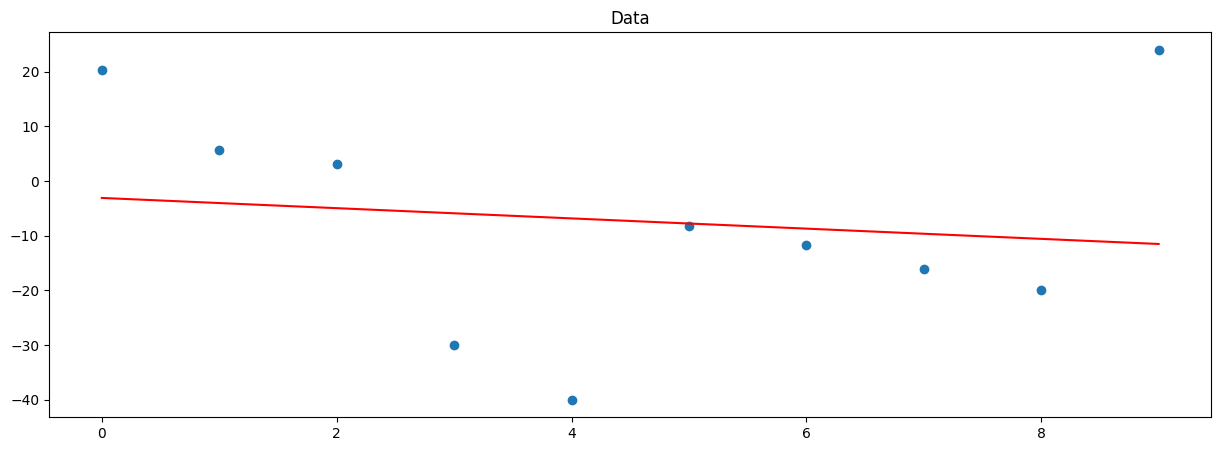

In [31]:
x_=np.array([0,1,2,3,4,5,6,7,8,9])
yt=np.array([20.26,5.61,3.14,-30,-40,-8.13,-11.73,-16.08,-19.95,24.03])
model=LinearRegression()
model.fit(x_.reshape(-1,1),yt)
print("intercept",model.intercept_)
print("coefficients",model.coef_)
y_pred=model.predict(x_.reshape(-1,1))
#plot the true data and the predicted data in scatter plot
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data")
plt.scatter(x_,yt)
plt.plot(x_,y_pred,color='red')
plt.show()


[ 12   8   4   0  -4  -8 -12 -16 -20 -24]
[0 1 2 3 4 5 6 7 8 9]
loss for model1 0.5352830136252733
loss for model2 0.8961272868514302


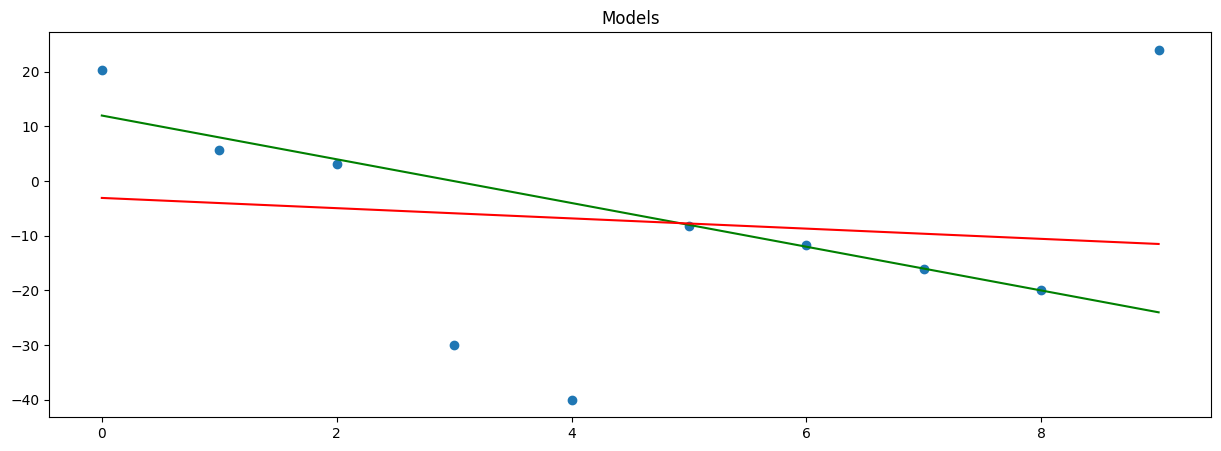

In [40]:
def model1(x):
    return -4*x+12

def lossfunc(y,y_pred,beta):
    n=len(y)
    return (1/n)*np.sum((y-y_pred)**2/((y-y_pred)**2+beta**2),axis=0)


y_predict1=model1(x_)
print(y_predict1)
print(x_)
loss1=lossfunc(yt,y_predict1,1)
loss=lossfunc(yt,y_pred,1)
print("loss for model1",loss1)
print("loss for model2",loss)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Models")
plt.scatter(x_,yt)
plt.plot(x_,y_predict1,color='green')
plt.plot(x_,y_pred,color='red')
plt.show()

